This Python notebook is focused on the usage of Piecewise Linear Regression (PWLR) AKA Piecewise Linear Fit (PWLF) for the task of WN the specific application, Baseload Calculation (as is described in the Thesis: "ML-ASSISTED DATA ANALYTICS AND WEATHER NORMALIZATION TO AID IN COMMERCIAL BUILDING ENERGY AUDITS").

# Libraries & Packages

**Degree Days and Standard Regression:**

Monthly, Daily, and Hourly


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from scipy.interpolate import griddata
from sklearn.preprocessing import StandardScaler

# Building 1, Baseline Calculation + Baseload Plot

In [ ]:
# Importing MONTHLY file from GitHub for Monthly Data
url = 'https://raw.githubusercontent.com/gvanwalsen/adv-weather-norm/main/LV_B1_monthlyrawdata.csv'
df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

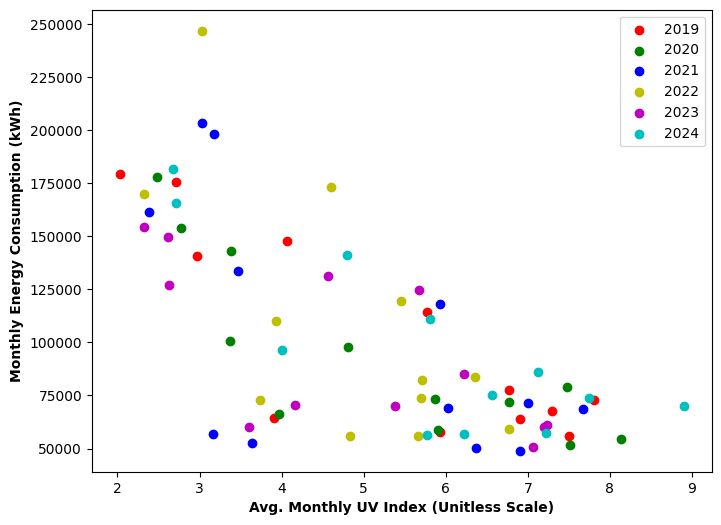

In [ ]:
# Data Re-arrangement
hq_arr = np.array(df1)
hq_raw = hq_arr[0:72,0:32]
hq_df = pd.DataFrame({'EnergyUse': hq_raw[:,3], 'Temp': hq_raw[:,6], 'Rel Humidity':hq_raw[:,10], 'UV':hq_raw[:,26]})
hq_df = hq_df.astype(float)
# print(hq_df)

# Divide variables
x = np.array(hq_arr[0:72,6:7]) # Temperarture
y = np.array(hq_arr[0:72,3:4]) # Energy Use
z = np.array(hq_arr[0:72,10:11]) # Relative Humidity

# Divide Variables by Year (x = temperature, y = energy use):
y2019 = np.array(hq_arr[0:12,3:4])
y2020 = np.array(hq_arr[12:24,3:4])
y2021 = np.array(hq_arr[24:36,3:4])
y2022 = np.array(hq_arr[36:48,3:4])
y2023 = np.array(hq_arr[48:60,3:4])
y2024 = np.array(hq_arr[60:72,3:4])

x2019 = np.array(hq_arr[0:12,6:7])
x2020 = np.array(hq_arr[12:24,6:7])
x2021 = np.array(hq_arr[24:36,6:7])
x2022 = np.array(hq_arr[36:48,6:7])
x2023 = np.array(hq_arr[48:60,6:7])
x2024 = np.array(hq_arr[60:72,6:7])

h2019 = np.array(hq_arr[0:12,10:11])
h2020 = np.array(hq_arr[12:24,10:11])
h2021 = np.array(hq_arr[24:36,10:11])
h2022 = np.array(hq_arr[36:48,10:11])
h2023 = np.array(hq_arr[48:60,10:11])
h2024 = np.array(hq_arr[60:72,10:11])

u2019 = np.array(hq_arr[0:12,26:27])
u2020 = np.array(hq_arr[12:24,26:27])
u2021 = np.array(hq_arr[24:36,26:27])
u2022 = np.array(hq_arr[36:48,26:27])
u2023 = np.array(hq_arr[48:60,26:27])
u2024 = np.array(hq_arr[60:72,26:27])

'''
# Plot to observe raw data (2D), Temp
plt.figure(figsize=(8, 6))
plt.scatter(x2019, y2019, marker='o', color ='r', label ='2019')
plt.scatter(x2020, y2020, marker='o', color ='g', label ='2020')
plt.scatter(x2021, y2021, marker='o', color ='b', label ='2021')
plt.scatter(x2022, y2022, marker='o', color ='y', label ='2022')
plt.scatter(x2023, y2023, marker='o', color ='m', label ='2023')
plt.scatter(x2024, y2024, marker='o', color ='c', label ='2024')
plt.xlabel('Avg. Monthly Temperature (Farenheit)', fontweight ='bold', fontsize = 10)
plt.ylabel('Monthly Energy Consumption (kWh)', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

# Plot to observe raw data (2D), Humidity
plt.figure(figsize=(8, 6))
plt.scatter(h2019, y2019, marker='o', color ='r', label ='2019')
plt.scatter(h2020, y2020, marker='o', color ='g', label ='2020')
plt.scatter(h2021, y2021, marker='o', color ='b', label ='2021')
plt.scatter(h2022, y2022, marker='o', color ='y', label ='2022')
plt.scatter(h2023, y2023, marker='o', color ='m', label ='2023')
plt.scatter(h2024, y2024, marker='o', color ='c', label ='2024')
plt.xlabel('Avg. Monthly Relative Humidity (Farenheit)', fontweight ='bold', fontsize = 10)
plt.ylabel('Monthly Energy Consumption (kWh)', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()
'''

# Plot to observe raw data (2D), UV Index
plt.figure(figsize=(8, 6))
plt.scatter(u2019, y2019, marker='o', color ='r', label ='2019')
plt.scatter(u2020, y2020, marker='o', color ='g', label ='2020')
plt.scatter(u2021, y2021, marker='o', color ='b', label ='2021')
plt.scatter(u2022, y2022, marker='o', color ='y', label ='2022')
plt.scatter(u2023, y2023, marker='o', color ='m', label ='2023')
plt.scatter(u2024, y2024, marker='o', color ='c', label ='2024')
plt.xlabel('Avg. Monthly UV Index (Unitless Scale)', fontweight ='bold', fontsize = 10)
plt.ylabel('Monthly Energy Consumption (kWh)', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

**Piecewise Regression:**

In [ ]:
!pip install piecewise-regression

In [ ]:
import piecewise_regression

In [ ]:
# Assign data
xx = hq_df["Rel Humidity"]
yy = hq_df["EnergyUse"]
xxl = xx.to_list()
yyl = yy.to_list()

# Add Relevant data, fit the model
pw_fit = piecewise_regression.Fit(xxl, yyl, start_values=None, n_breakpoints=2)

# Print a summary of the fit
pw_fit.summary()
print("Done")


                    Breakpoint Regression Results                     
No. Observations                       72
No. Model Parameters                    6
Degrees of Freedom                     66
Res. Sum of Squares           1.94027e+10
Total Sum of Squares          1.59429e+11
R Squared                        0.878299
Adjusted R Squared               0.867066
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const            3.17933e+05      1.4e+04       22.703      6.79e-33   2.8997e+05   3.4589e+05
alpha1              -6119.68     4.55e+02      -13.458      1.37e-20      -7027.6      -5211.8
beta1                6056.23     1.04e+03       5.8278             -       3981.4       8131.1
beta2                2502.25     1.51e+03       1.6572             -       -512.4       5516.9
breakpoint1      

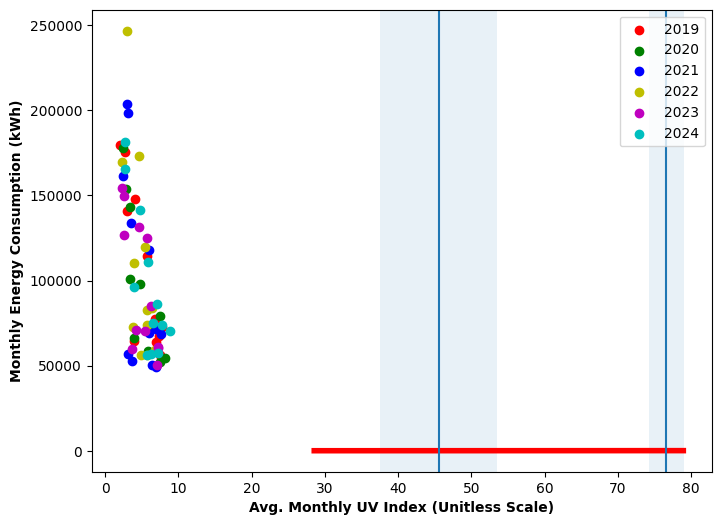

In [ ]:
# Plot the data, fit, breakpoints and confidence intervals
#pw_fit.plot_data(color="grey", s=20)
plt.figure(figsize=(8, 6))
plt.scatter(u2019, y2019, marker='o', color ='r', label ='2019')
plt.scatter(u2020, y2020, marker='o', color ='g', label ='2020')
plt.scatter(u2021, y2021, marker='o', color ='b', label ='2021')
plt.scatter(u2022, y2022, marker='o', color ='y', label ='2022')
plt.scatter(u2023, y2023, marker='o', color ='m', label ='2023')
plt.scatter(u2024, y2024, marker='o', color ='c', label ='2024')
plt.xlabel('Avg. Monthly UV Index (Unitless Scale)', fontweight ='bold', fontsize = 10)
plt.ylabel('Monthly Energy Consumption (kWh)', fontweight ='bold', fontsize = 10)

# Pass in standard matplotlib keywords to control any of the plots
pw_fit.plot_fit(color="red", linewidth=4)
pw_fit.plot_breakpoints()
pw_fit.plot_breakpoint_confidence_intervals()
plt.ylabel("Monthly Energy Consumption (kWh)", fontweight ='bold', fontsize = 10)
plt.xlabel("Avg. Monthly UV Index (Unitless Scale)", fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()
plt.close()

In [ ]:
# Sample DataFrame
data_pwlf = [xx, yy]
df_pwlf = pd.DataFrame(data_pwlf)
df_pwlf = df_pwlf.transpose()
df_pwlf.columns = [0, 1]

# Define the range (from PWLF above)
lower_bound = 3.25
upper_bound = 3.61

# Filter the DataFrame
filtered_df = df_pwlf[(df_pwlf[0] >= lower_bound) & (df_pwlf[0] <= upper_bound)]

# Calculate (average) baseline
mean_value = filtered_df[1].mean()
print(mean_value)

n_repeats = 12
baseline_plot = np.repeat(mean_value, n_repeats)
print(baseline_plot)

109456.5
[109456.5 109456.5 109456.5 109456.5 109456.5 109456.5 109456.5 109456.5
 109456.5 109456.5 109456.5 109456.5]


**Raw Data Plotting:**

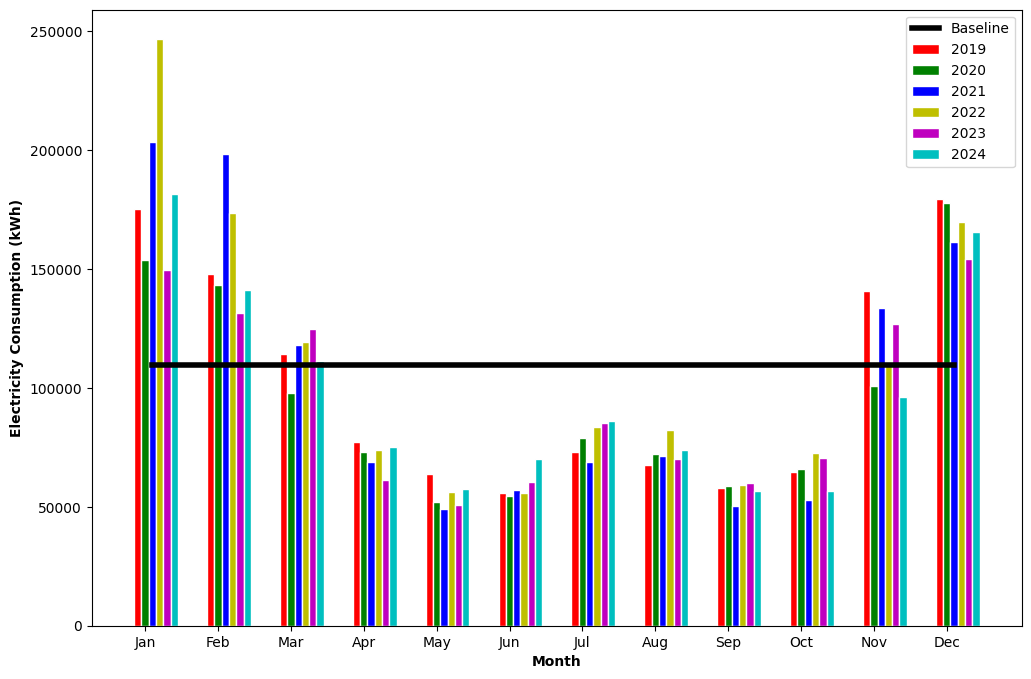

In [ ]:
barWidth = 0.1
fig = plt.subplots(figsize =(12, 8))

x2019 = np.array(hq_arr[0:12,3:4])
# print(x2019)
x2020 = np.array(hq_arr[12:24,3:4])
# print(x2020)
x2021 = np.array(hq_arr[24:36,3:4])
# print(x2021)
x2022 = np.array(hq_arr[36:48,3:4])
# print(x2022)
x2023 = np.array(hq_arr[48:60,3:4])
# print(x2023)
x2024 = np.array(hq_arr[60:72,3:4])
# print(x2024)

t2019 = x2019.flatten()
t2020 = x2020.flatten()
t2021 = x2021.flatten()
t2022 = x2022.flatten()
t2023 = x2023.flatten()
t2024 = x2024.flatten()

br1 = np.arange(len(x2019))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]

plt.bar(br1, t2019, color ='r', width = barWidth,
        edgecolor ='w', label ='2019')
plt.bar(br2, t2020, color ='g', width = barWidth,
        edgecolor ='w', label ='2020')
plt.bar(br3, t2021, color ='b', width = barWidth,
        edgecolor ='w', label ='2021')
plt.bar(br4, t2022, color ='y', width = barWidth,
        edgecolor ='w', label ='2022')
plt.bar(br5, t2023, color ='m', width = barWidth,
        edgecolor ='w', label ='2023')
plt.bar(br6, t2024, color ='c', width = barWidth,
        edgecolor ='w', label ='2024')
plt.plot(br3, baseline_plot, color ='black', linewidth=4, label='Baseline')

plt.xlabel('Month', fontweight ='bold', fontsize = 10)
plt.ylabel('Electricity Consumption (kWh)', fontweight ='bold', fontsize = 10)
plt.xticks([r + barWidth for r in range(len(x2019))],
        ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend()
plt.show()

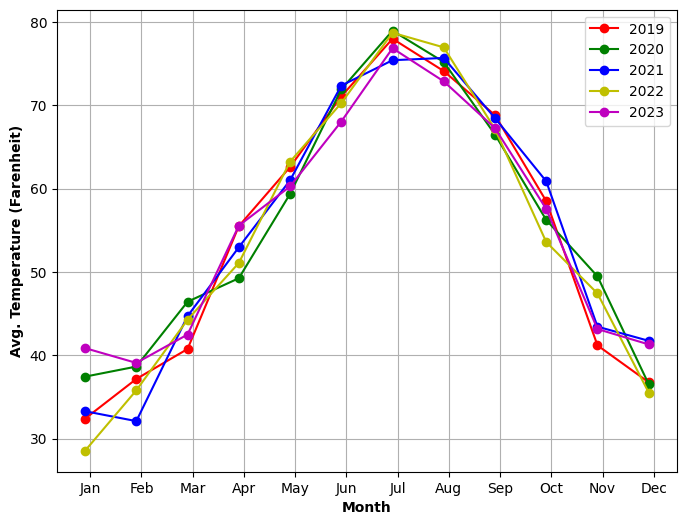

In [ ]:
xx2019 = np.array(hq_arr[0:12,3:4])
# print(x2019)
xx2020 = np.array(hq_arr[12:24,3:4])
# print(x2020)
xx2021 = np.array(hq_arr[24:36,3:4])
# print(x2021)
xx2022 = np.array(hq_arr[36:48,3:4])
# print(x2022)
xx2023 = np.array(hq_arr[48:62,3:4])
# print(x2023)

tt2019 = xx2019.flatten()
tt2020 = xx2020.flatten()
tt2021 = xx2021.flatten()
tt2022 = xx2022.flatten()
tt2023 = xx2023.flatten()
y = np.arange(len(x2019))

# Create a line chart
plt.figure(figsize=(8, 6))
plt.plot(y, tt2019, marker='o', linestyle='-', color ='r', label ='2019')
plt.plot(y, tt2020, marker='o', linestyle='-', color ='g', label ='2020')
plt.plot(y, tt2021, marker='o', linestyle='-', color ='b', label ='2021')
plt.plot(y, tt2022, marker='o', linestyle='-', color ='y', label ='2022')
plt.plot(y, tt2023, marker='o', linestyle='-', color ='m', label ='2023')

# Add title and labels
plt.xlabel('Month', fontweight ='bold', fontsize = 10)
plt.ylabel('Avg. Temperature (Farenheit)', fontweight ='bold', fontsize = 10)
plt.xticks([r + barWidth for r in range(len(x2019))],
        ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Display grid
plt.grid(True)

# Show the plot
plt.legend()
plt.show()

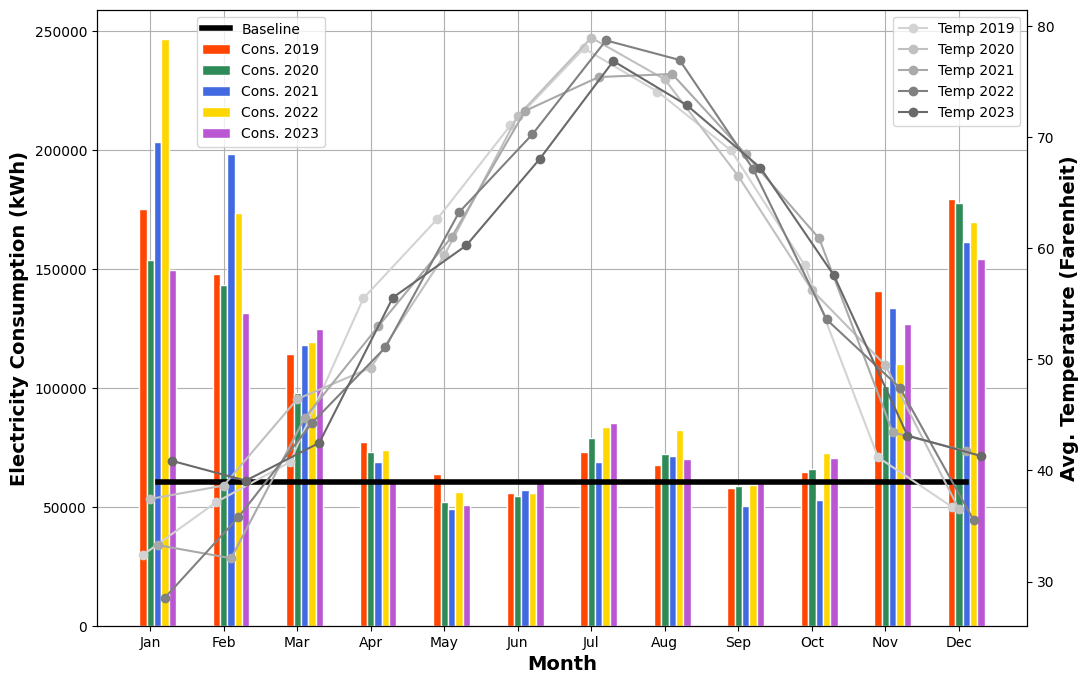

In [ ]:
barWidth = 0.1
fig, ax1 = plt.subplots(figsize =(12, 8))
ax2 = ax1.twinx()

ax1.bar(br1, t2019, color ='orangered', width = barWidth, edgecolor ='w', label ='Cons. 2019')
ax1.bar(br2, t2020, color ='seagreen', width = barWidth, edgecolor ='w', label ='Cons. 2020')
ax1.bar(br3, t2021, color ='royalblue', width = barWidth, edgecolor ='w', label ='Cons. 2021')
ax1.bar(br4, t2022, color ='gold', width = barWidth, edgecolor ='w', label ='Cons. 2022')
ax1.bar(br5, t2023, color ='mediumorchid', width = barWidth, edgecolor ='w', label ='Cons. 2023')
ax1.plot(br3, baseline_plot, color ='black', linewidth=4, label='Baseline')
ax1.set_axisbelow(True)

ax1.set_xlabel('Month', fontweight ='bold', fontsize = 14)
ax1.set_ylabel('Electricity Consumption (kWh)', fontweight ='bold', fontsize = 14)
ax1.set_xticks([r + barWidth for r in range(len(x2019))],
        ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

ax2.plot(br1, tt2019, marker='o', linestyle='-', color ='lightgray', label ='Temp 2019')
ax2.plot(br2, tt2020, marker='o', linestyle='-', color ='silver', label ='Temp 2020')
ax2.plot(br3, tt2021, marker='o', linestyle='-', color ='darkgray', label ='Temp 2021')
ax2.plot(br4, tt2022, marker='o', linestyle='-', color ='gray', label ='Temp 2022')
ax2.plot(br5, tt2023, marker='o', linestyle='-', color ='dimgray', label ='Temp 2023')
ax2.set_ylabel('Avg. Temperature (Farenheit)', fontweight ='bold', fontsize = 14)

# Show the plot
ax2.legend(loc=1, bbox_to_anchor=(1,1))
ax1.legend(loc=2, bbox_to_anchor=(0.1,1))
ax1.grid(True)
plt.show()